In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [38]:
df = 'C:\\Users\\91630\\OneDrive\\Desktop\\Informatics assignments\\project proposal\\Customer Segmentation\\Train.csv'

train_df = pd.read_csv('C:\\Users\\91630\\OneDrive\\Desktop\\Informatics assignments\\project proposal\\Customer Segmentation\\Test.csv')
test_df = pd.read_csv('C:\\Users\\91630\\OneDrive\\Desktop\\Informatics assignments\\project proposal\\Customer Segmentation\\Train.csv')

In [39]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


# Exploratory Data Analysis and Data Preprocessing

In [40]:
train_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [41]:
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

# check for duplicate samples

In [42]:
 train_df.duplicated().sum()

0

# forward fill of missing values

In [43]:
def forward_fill(df):
    df_filled = df.apply(lambda col: col.fillna(method='ffill') if col.isnull().any() else col, axis=0)
    return df_filled

train1  = forward_fill(train_df)

In [44]:
train1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

# drop unwanted columns

In [45]:
train=train1.drop(['ID','Var_1'],axis=1)
train


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,Healthcare,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,11.0,Low,4.0
...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,Female,No,53,Yes,Entertainment,1.0,Low,2.0
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0


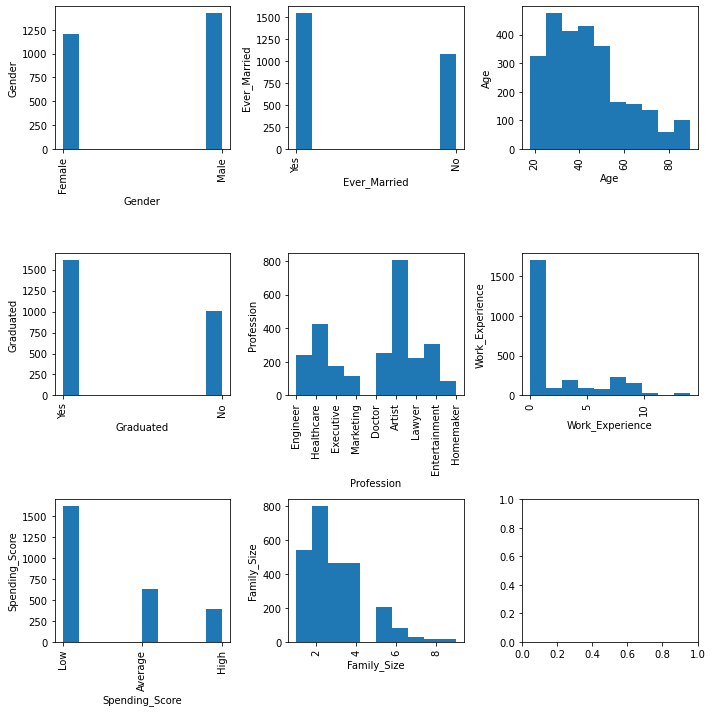

In [46]:
import matplotlib.pyplot as plt

plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(min(9, train.shape[1])):
    plt.subplot(3, 3, i + 1)
    plt.hist(train.iloc[:, i])
    plt.xlabel(train.columns[i])
    plt.ylabel(train.columns[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


C:\Users\91630\shhriya123\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91630\shhriya123\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91630\shhriya123\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


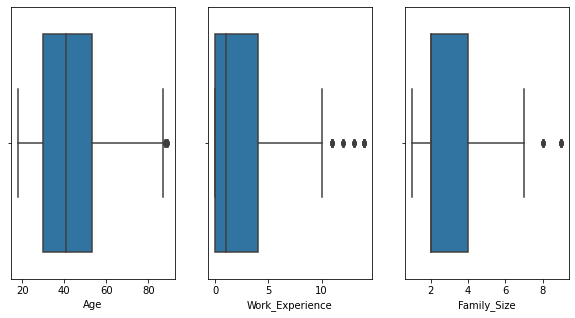

In [47]:
#box plot of neumerical features
plt.subplots(nrows=1,ncols=3,figsize = (10,5))
k=0
for i in range(train.shape[1]):
    if type(train.iloc[0,i]) == np.int64 or type(train.iloc[0,i]) == np.float64:
        plt.subplot(1,3,k+1)
        sns.boxplot(train.iloc[:,i])
        plt.xlabel(train.columns[i])
        k +=1 

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.DataFrame({'Age': ['20 years old', '30 years old', '25 years old']})

text_data = df['Age']

vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(text_data)

tdm_df = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names_out())
print(tdm_df)


   20  25  30  old  years
0   1   0   0    1      1
1   0   0   1    1      1
2   0   1   0    1      1


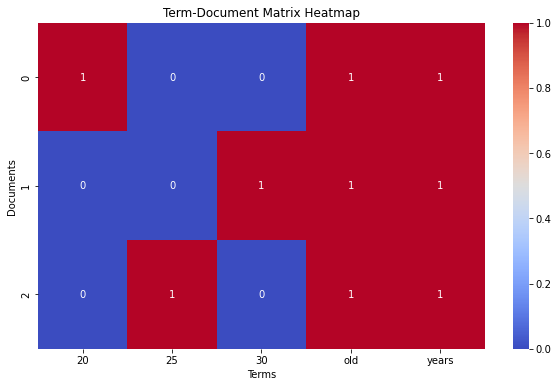

In [49]:
# Generating heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tdm_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Term-Document Matrix Heatmap')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()